In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reader

In [44]:
file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_2.scan"     # series config, read S11 and S21
#file_path = "/home/cmsdaq/Analysis/Data/Test/BAW_6_1.scan"                    # parallel conf, read B  (repro)
#file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_1.scan"    # parallel config, read B
#file_path = "/home/cmsdaq/Analysis/Data/RUN_5/processed_data/BAW_5_8.scan"    # VNA 3 porte, 0-20 MHz
reader = scan_handler.ScanReader(file_path)        # create the object

In [45]:
reader.get_resonances_list()

['resonance_100',
 'resonance_1000',
 'resonance_1009',
 'resonance_1015',
 'resonance_1024',
 'resonance_1033',
 'resonance_1042',
 'resonance_1048',
 'resonance_1057',
 'resonance_1063',
 'resonance_1072',
 'resonance_1081',
 'resonance_1087',
 'resonance_109',
 'resonance_1096',
 'resonance_1102',
 'resonance_1111',
 'resonance_1117',
 'resonance_1126',
 'resonance_1132',
 'resonance_1141',
 'resonance_1147',
 'resonance_1156',
 'resonance_1162',
 'resonance_1171',
 'resonance_1177',
 'resonance_118',
 'resonance_1183',
 'resonance_1192',
 'resonance_1198',
 'resonance_1207',
 'resonance_1213',
 'resonance_1222',
 'resonance_1228',
 'resonance_1237',
 'resonance_1243',
 'resonance_1249',
 'resonance_1258',
 'resonance_1264',
 'resonance_127',
 'resonance_1273',
 'resonance_1282',
 'resonance_1288',
 'resonance_1297',
 'resonance_13',
 'resonance_1306',
 'resonance_1312',
 'resonance_1318',
 'resonance_1327',
 'resonance_1336',
 'resonance_1342',
 'resonance_1351',
 'resonance_136',


In [46]:
# get the name list of all the resonances parameters 
print(reader.get_parameters_tags())

['C_baw', 'L_baw', 'Q', 'R_baw', 'R_par', 'asim', 'bw', 'depth', 'er_Q', 'er_asim', 'er_f0', 'er_gamma', 'er_norm', 'f0', 'fcenter', 'fmax', 'fmin', 'gamma', 'input_power', 'norm', 'npt', 'offset_at_peak', 'span', 'sweep', 'x']


In [47]:
# get the parameter Q for all the resonances as an array
R = reader.get_parameters('f0')
print(np.sort(R))

[-2.         -2.         -2.         -2.         -2.         -2.
 -2.          1.23471509  1.30839208  1.55164675  1.75104181  1.75921399
  1.831923    1.86795884  1.89722266  1.96531783  2.12107657  2.23971527
  2.51432621  2.54026692  2.59889449  2.63809074  2.74678738  2.98847324
  3.00470534  3.06876722  3.09821193  3.10987698  3.13218349  3.15250836
  3.21777814  3.22963015  3.23040263  3.44486167  3.90797888  3.91925954
  3.95211703  4.31736023  4.54174949  4.69806967  4.75966368  4.76730954
  4.93975663  4.99601913  4.99991412  4.99991416  5.08691105  5.09010711
  5.09400688  5.17416044  5.18152817  5.18368671  5.18961917  5.23807771
  5.26136388  5.287462    5.3572609   5.47727629  5.54810125  5.56065442
  5.57411222  5.62209503  5.64632664  5.65817734  5.67251548  5.69789558
  5.72406614  5.72554979  5.74454833  5.87020357  5.97068809  6.10341578
  6.14322614  6.30768548  6.92201552  7.12046757  7.13932067  7.3111886
  7.33898804  7.34362551  7.55624436  7.62031465  7.63620476

In [48]:
# get (as a python dictionary) all the resonance parameter. 
# you can get a resonance from its raw name
#           reader.get_resonance(name="resonance_10")
# you can get a resonance from its position inside the .scan
# e.g.: get the seventh resonance
#           reader.get_resonance(loc=7)
# you can get the resonance from its frequency (the middle frequency). 
# it gets the closest resonance to the selected frequency

resonance = reader.get_resonance(freq=5.8e6, label="S21")

KeyError: "Unable to open object (object 'dataS21' doesn't exist)"

In [37]:
for key in resonance.keys():
    print(key)
print("The resonance called ",resonance['reso_name'] ," has a Q = ", resonance['Q'])

C_baw
L_baw
Q
Qcorr
R_baw
R_par
asim
bw
depth
er_Q
er_asim
er_f0
er_gamma
er_norm
f0
fcenter
fmax
fmin
gamma
input_power
norm
npt
offset_at_peak
span
sweep
x
freq
phase
power
reso_name
The resonance called  resonance_837  has a Q =  3913458.468559746


## Useful(?) examples

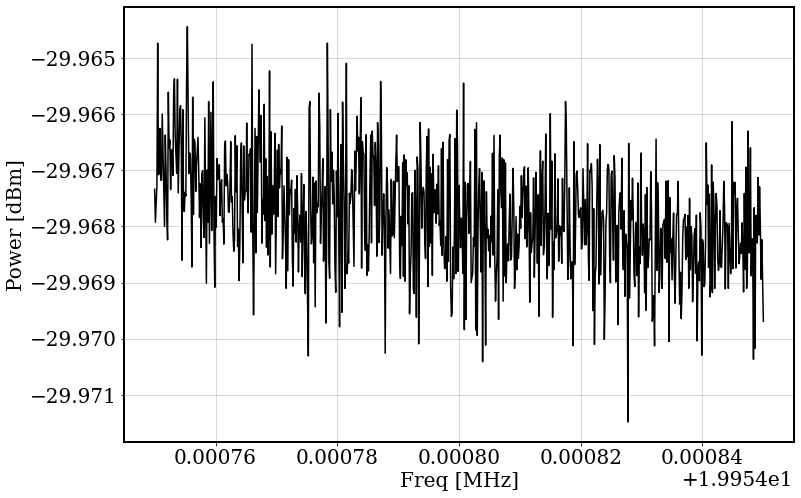

In [39]:
# plot the resonance at 5.66 MHz
reso = reader.get_resonance(freq=5.66e6, label="")

plt.plot(reso['freq']*1e-6,reso['power'],c='k')
plt.xlabel('Freq [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

In [40]:
print(reso['R_baw'])
print(reso['R_par'])
print(reso['x'])

print(reso['depth'])


print(reso['C_baw'])
print(reso['L_baw'])

print(reso['f0'])

-511240971.4950411
50.000004890062385
0.2500000244503113
-4.2474538986419076e-07
-3.448116154975072e-25
-184486908.064204
19.954755545814493


conversion is: dBm-W
Parametro  1 :  -1.7644784892997926e-13  +/-  8.010101146915707e-14
Parametro  2 :  2.205211431486018e-07  +/-  1.545604066328921e-07
Parametro  3 :  19.954755545814493  +/-  1.236725675182506e-07
Parametro  4 :  -0.0030358239121313995  +/-  0.00027392258887073344
Parametro  5 :  0.061586699943513304  +/-  0.00546607079216688
Parametro  6 :  4.445783028874971  +/-  2.213633681761249e-07
Q = 4.52e+07  +/-  0.2804097733043943


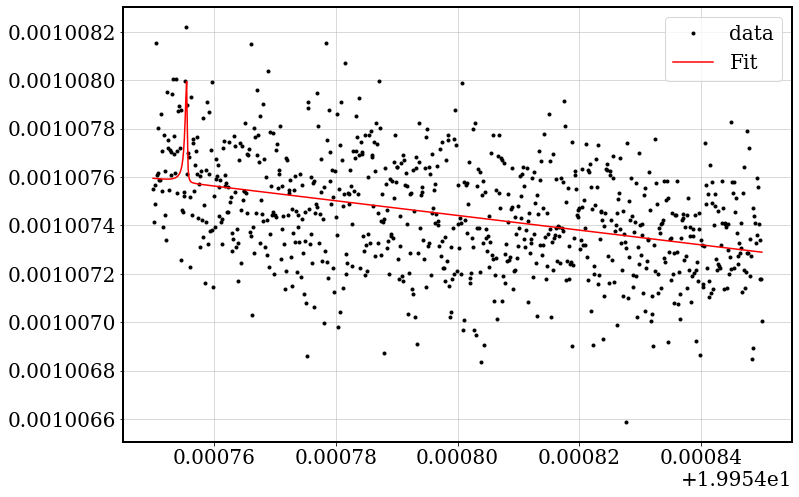

In [41]:
from process import utils
utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)


In [42]:
from process import utils

# plot all the resonance with a Q greater than 1e7
Q = reader.get_parameters('Q')
loc = np.where(Q>3e6)[0]

for l in loc:
    power = reader.get_resonance(loc=l, label="S21")['power']
    freq = reader.get_resonance(loc=l, label="S21")['freq']
    f0 = reader.get_resonance(loc=l, label="S21")['f0']
    
    #utils.fit_resonance(freq*1e-6, power,verbose=True)
    
    plt.plot(power,label=str(np.round(f0)))
    
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dB]')
plt.grid(alpha=0.6)
plt.show()

KeyError: "Unable to open object (object 'dataS21' doesn't exist)"

In [43]:
reso = reader.get_resonance(loc=38, label="S21")

plt.plot(reso['freq']*1e-6, reso['power'],label=str(np.round(f0)))

plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)



KeyError: "Unable to open object (object 'dataS21' doesn't exist)"

In [13]:
#Q = np.sort(reader.get_parameters('Q'))[-1]
#print(Q)
Q = reader.get_parameters('Q')
f = reader.get_parameters('f0')
d = reader.get_parameters('depth')

loc = np.intersect1d(np.where(d>7)[0], np.where(d > 0.05)[0])

#loc = np.where(f>17)[0]

for l in loc:
    print(l)

    power = reader.get_resonance(loc=l, label="S21")['power']
    freq = reader.get_resonance(loc=l, label="S21")['freq']

    print(d[l])
    utils.fit_resonance(freq*1e-6, power, verbose=True)



conversion is: dBm-W
Parametro  1 :  -3.688398352696137e-09  +/-  1.6706331463660364e-12
Parametro  2 :  8.594173086369772e-06  +/-  5.139442140019427e-09
Parametro  3 :  8.669158401087874  +/-  6.520729516126342e-09
Parametro  4 :  -0.000901599671424097  +/-  4.454711477757724e-05
Parametro  5 :  0.007820284879409275  +/-  0.00038618725832033465
Parametro  6 :  1.1063824038057577  +/-  0.0016911090612715962
Q = 5.04e+05  +/-  0.0003793692220645468


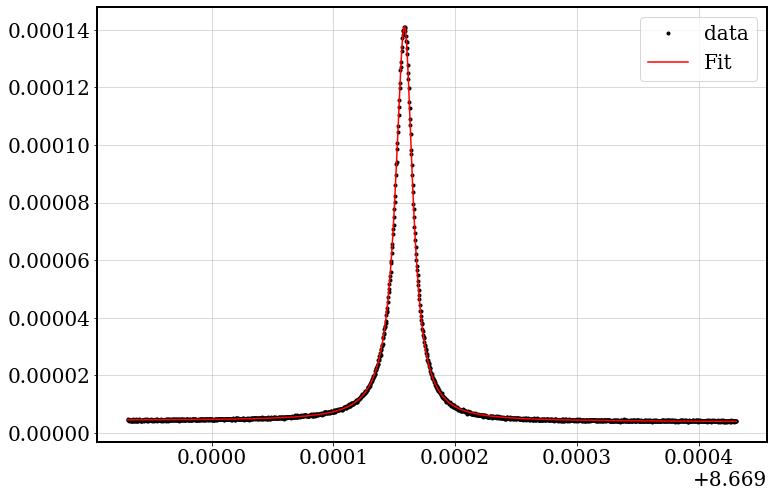

In [14]:
index = 4
power = reader.get_resonance(loc=index, label="S21")['power']
freq = reader.get_resonance(loc=index, label="S21")['freq']
utils.fit_resonance(freq*1e-6, power, verbose=True)

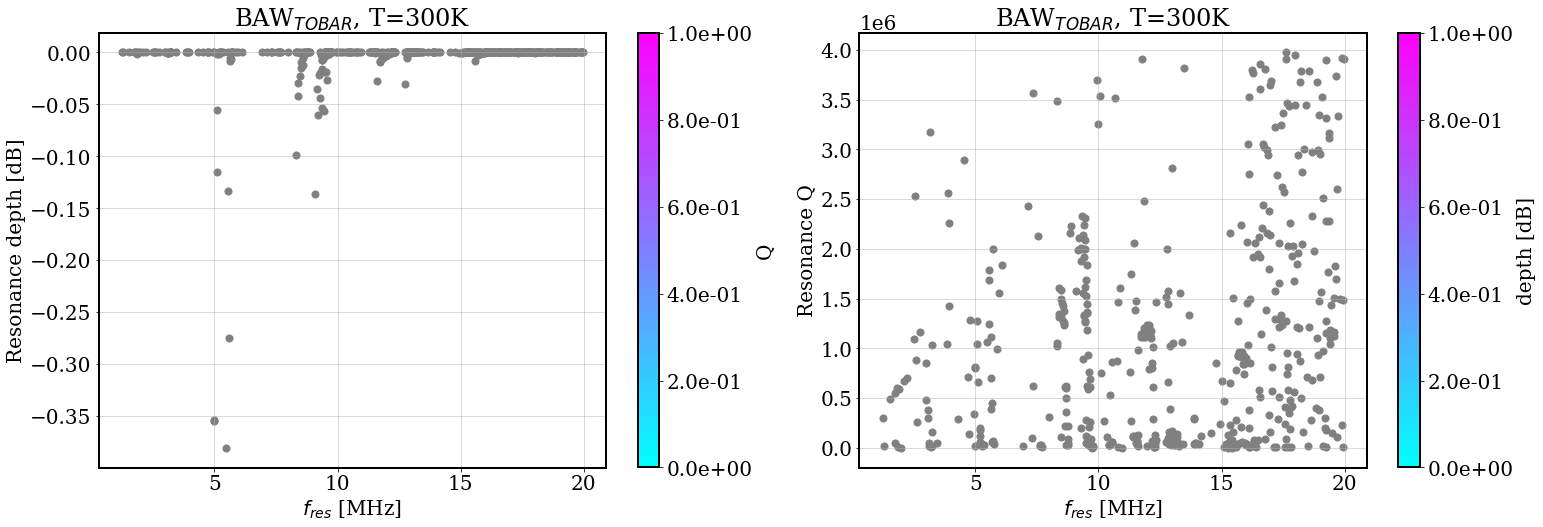

In [15]:
from matplotlib  import cm
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')


depth_thr = 0.0015 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where((Q != -2) & (Q < 4e6) )[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(25)

d = ax1.scatter(peak_pos[ii2],depth[ii2],s=50,          marker = 'o', color='grey')
d = ax1.scatter(peak_pos[ii], depth[ii], s=50, c=Q[ii], marker = 'o', cmap = cm.cool )
ax1.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(d,label='Q',format='%.1e', ax=ax1)
ax1.set_xlabel(r'$f_{res}$ [MHz]')
ax1.set_ylabel('Resonance depth [dB]')

e = ax2.scatter(peak_pos[ii2],Q[ii2],s=50,marker='o',color='grey')
e = ax2.scatter(peak_pos[ii], Q[ii],s=50, c=depth[ii], marker = 'o', cmap = cm.cool )
ax2.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(e,label='depth [dB]',format='%.1e', ax=ax2)
ax2.set_xlabel(r'$f_{res}$ [MHz]')
ax2.set_ylabel('Resonance Q')

ax1.grid(alpha=0.6)
ax2.grid(alpha=0.6)

#plt.savefig('Scan_22.png')
plt.show()

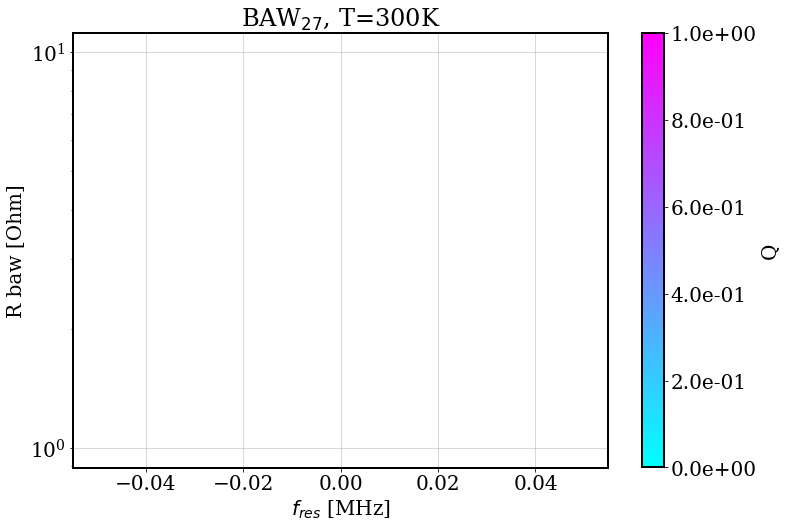

In [16]:
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')
R = reader.get_parameters('R_baw')
C = reader.get_parameters('C_baw')
L = reader.get_parameters('L_baw')

depth_thr = 0.02 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where(Q > 1e6)[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig = plt.figure()
ax = fig.add_subplot(111)
#d =ax.scatter(peak_pos[ii2],R[ii2],s=50,marker='o',color='grey')
d =ax.scatter(peak_pos[ii],R[ii],s=50,c=Q[ii], marker = 'o', cmap = cm.cool )

plt.title(r'BAW$_{27}$, T=300K')
plt.colorbar(d,label='Q',format='%.1e')
plt.xlabel(r'$f_{res}$ [MHz]')
plt.ylabel('R baw [Ohm]')
plt.grid(alpha=0.6)
plt.yscale('log')
#plt.savefig('Scan_22.png')
plt.show()

